In [33]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [34]:
data = pd.read_csv("./Raemian_final.csv")

In [35]:
data

,계약년월,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202010,10,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10383.036720
1,202010,10,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10383.036720
2,202010,4,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10647.853810
3,202011,17,강남구,2020,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,10758.194260
4,202011,17,강남구,2020,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,10758.194260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,202204,21,마포구,2014,"15,206,688","9,052,434",104.2,130,"-2,370","11,100.76",...,-0.016817,34314.99004,0.008382,1617.01,-3.08,2695.05,-2.27,904.75,-4.21,7560.510686
8371,202205,17,마포구,2014,"14,845,927","7,537,472",104.2,"3,796","-1,577","11,610.39",...,-0.116800,32379.46280,-0.056405,1615.30,-0.11,2685.90,-0.34,893.36,-1.26,7301.491662
8372,202208,7,마포구,2014,"13,709,893","7,038,729",103.4,"-2,912","-9,422","8,700.34",...,0.081533,33009.56488,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,7993.599664
8373,202209,5,마포구,2014,"15,299,641","8,373,286",102.6,"2,089","-3,837","7,955.08",...,-0.092871,30649.55952,-0.071495,1273.87,-13.28,2155.49,-12.81,672.65,-16.65,6678.431040


In [36]:
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [37]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '도봉구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


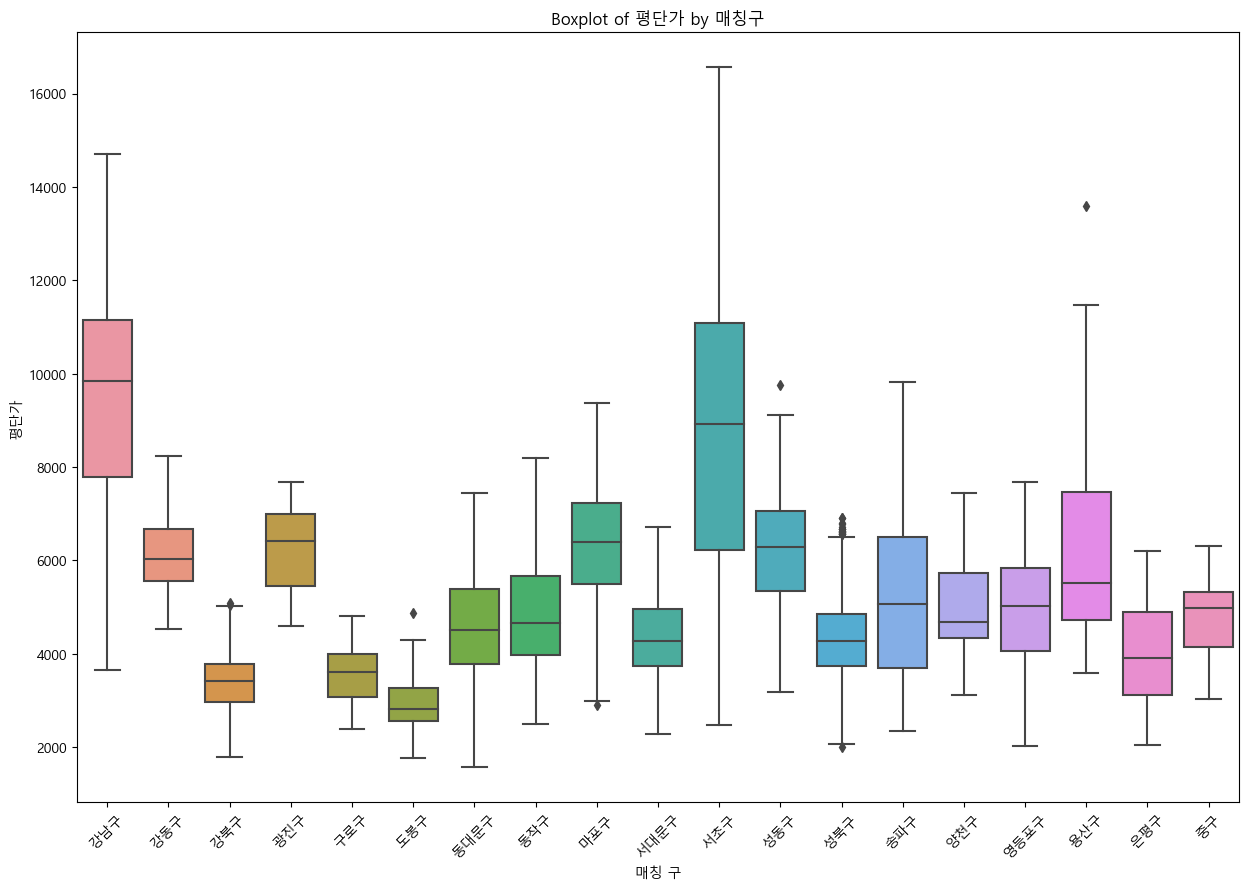

매칭 구
강남구     9502.469728
강동구     6143.186789
강북구     3396.781953
광진구     6203.757393
구로구     3578.316768
도봉구     2890.708765
동대문구    4588.091618
동작구     4885.502032
마포구     6304.580796
서대문구    4361.194810
서초구     8512.342704
성동구     6220.425067
성북구     4295.517858
송파구     5202.733428
양천구     4960.984637
영등포구    4983.325337
용산구     6059.662726
은평구     4065.984429
중구      4784.369367
Name: 평당가, dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  7778.914393
상위 25% :  11145.23319
강남구 평균 평당가:  9502.469727680636
강남구 전체 개수 : 501
강남구 필터링 개수 501
이상치 개수(제거) : 0


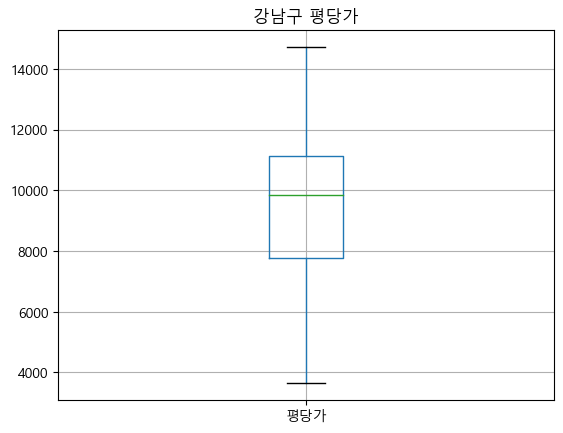

하위 25% :  5549.0354775
상위 25% :  6677.793875
강동구 평균 평당가:  6143.186789442916
강동구 전체 개수 : 727
강동구 필터링 개수 727
이상치 개수(제거) : 0


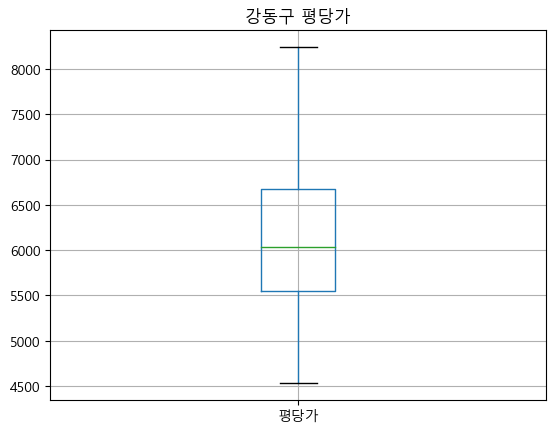

하위 25% :  2956.8177
상위 25% :  3782.700458
강북구 평균 평당가:  3406.9227110577503
강북구 전체 개수 : 329
강북구 필터링 개수 327
이상치 개수(제거) : 2


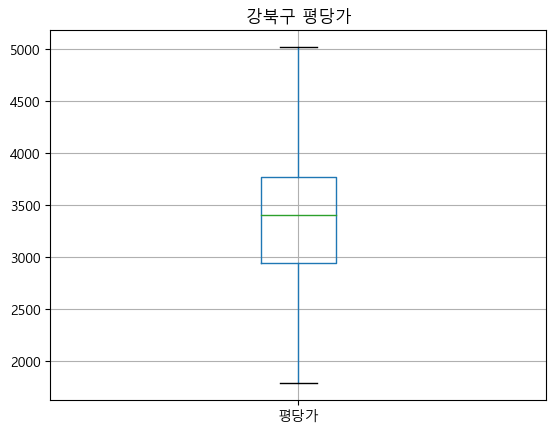

하위 25% :  5446.128501
상위 25% :  6993.73272575
광진구 평균 평당가:  6203.75739332
광진구 전체 개수 : 50
광진구 필터링 개수 50
이상치 개수(제거) : 0


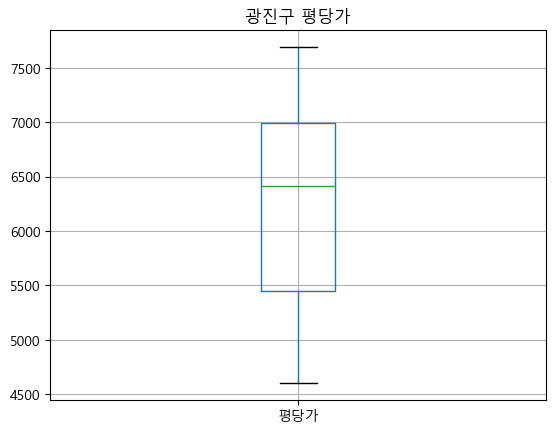

하위 25% :  3067.735333
상위 25% :  3999.807981
구로구 평균 평당가:  3578.316768419048
구로구 전체 개수 : 105
구로구 필터링 개수 105
이상치 개수(제거) : 0


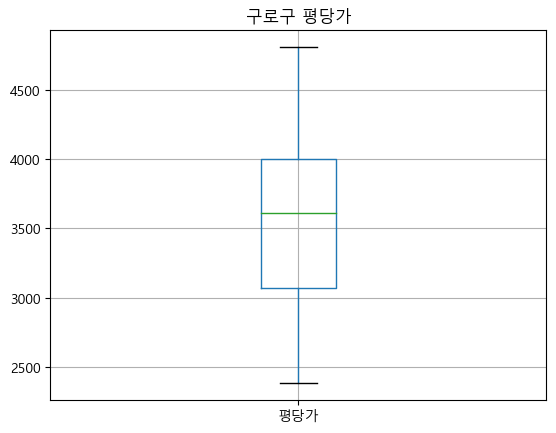

하위 25% :  nan
상위 25% :  nan
노원구 평균 평당가:  nan
노원구 전체 개수 : 0
노원구 필터링 개수 0
이상치 개수(제거) : 0


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


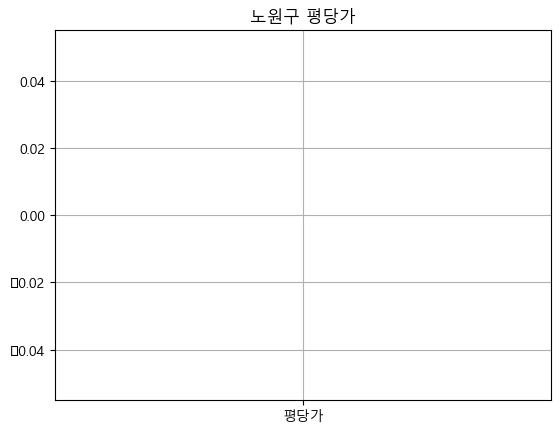

하위 25% :  3770.4807425
상위 25% :  5389.96722575
동대문구 평균 평당가:  4588.091618422019
동대문구 전체 개수 : 872
동대문구 필터링 개수 872
이상치 개수(제거) : 0


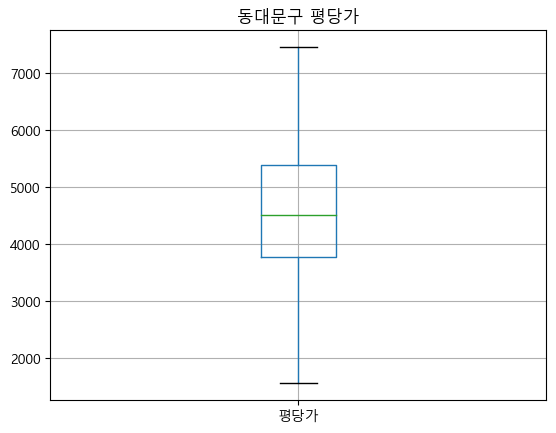

하위 25% :  3969.4585429999997
상위 25% :  5661.3387875
동작구 평균 평당가:  4885.502032334135
동작구 전체 개수 : 416
동작구 필터링 개수 416
이상치 개수(제거) : 0


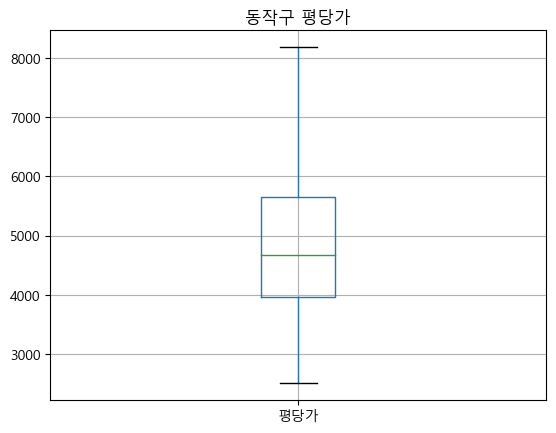

하위 25% :  5504.12279375
상위 25% :  7226.865542
마포구 평균 평당가:  6301.829450912622
마포구 전체 개수 : 1236
마포구 필터링 개수 1235
이상치 개수(제거) : 1


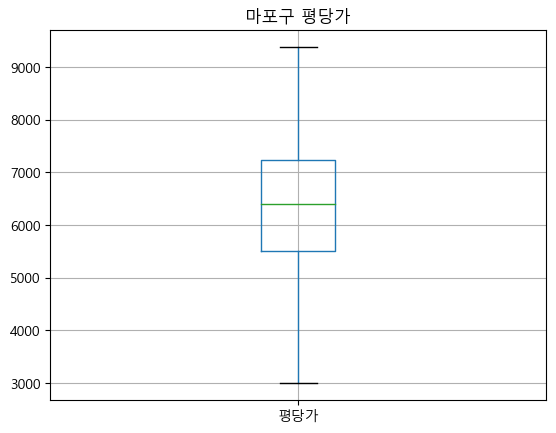

하위 25% :  3743.730018
상위 25% :  4961.618599
서대문구 평균 평당가:  4361.194809693878
서대문구 전체 개수 : 441
서대문구 필터링 개수 441
이상치 개수(제거) : 0


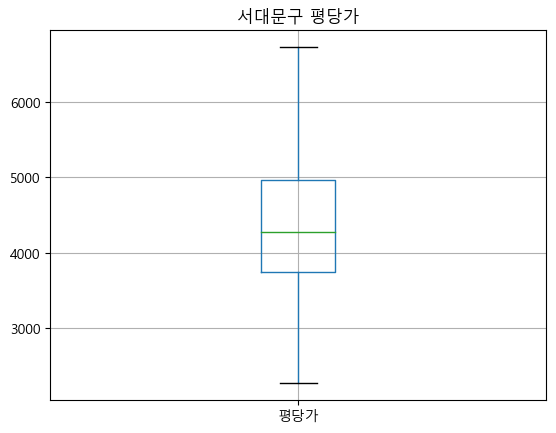

하위 25% :  6217.625288499999
상위 25% :  11090.677025
서초구 평균 평당가:  8512.342703784641
서초구 전체 개수 : 599
서초구 필터링 개수 599
이상치 개수(제거) : 0


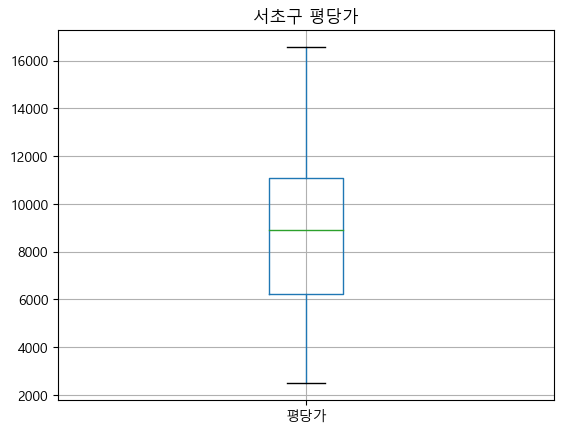

하위 25% :  5336.01327075
상위 25% :  7064.8746785
성동구 평균 평당가:  6235.966914517544
성동구 전체 개수 : 228
성동구 필터링 개수 227
이상치 개수(제거) : 1


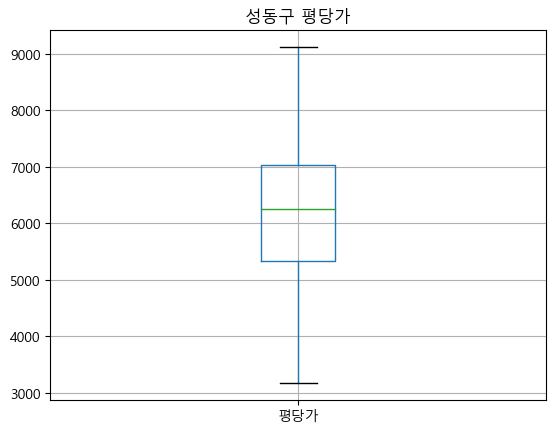

하위 25% :  3737.641329
상위 25% :  4855.790352
성북구 평균 평당가:  4324.051590562451
성북구 전체 개수 : 1257
성북구 필터링 개수 1240
이상치 개수(제거) : 17


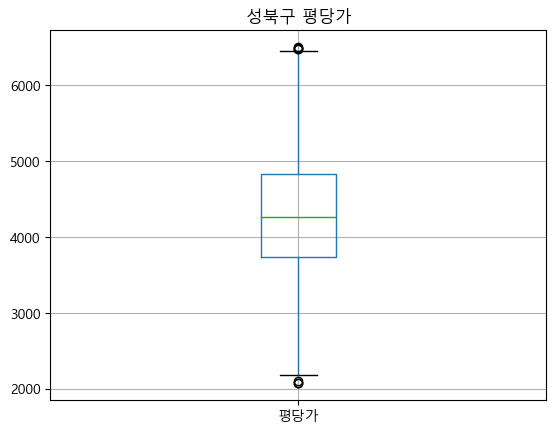

하위 25% :  3689.203935
상위 25% :  6504.875934
송파구 평균 평당가:  5202.733428419142
송파구 전체 개수 : 303
송파구 필터링 개수 303
이상치 개수(제거) : 0


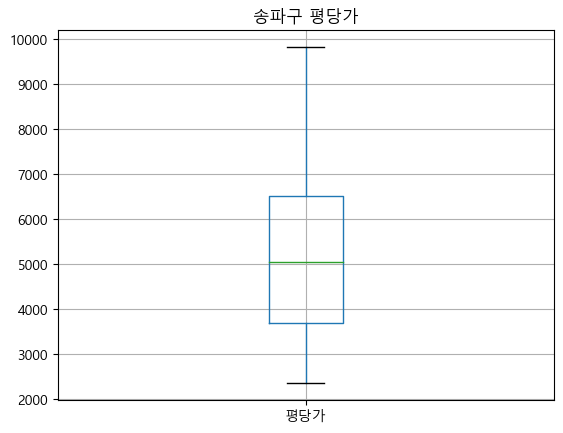

하위 25% :  4051.6373427500002
상위 25% :  5836.33969825
영등포구 평균 평당가:  4983.325337498016
영등포구 전체 개수 : 504
영등포구 필터링 개수 504
이상치 개수(제거) : 0


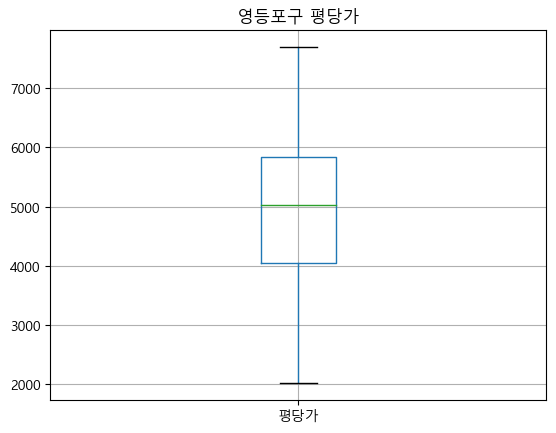

하위 25% :  4714.768241
상위 25% :  7472.238048
용산구 평균 평당가:  6113.099086560283
용산구 전체 개수 : 141
용산구 필터링 개수 140
이상치 개수(제거) : 1


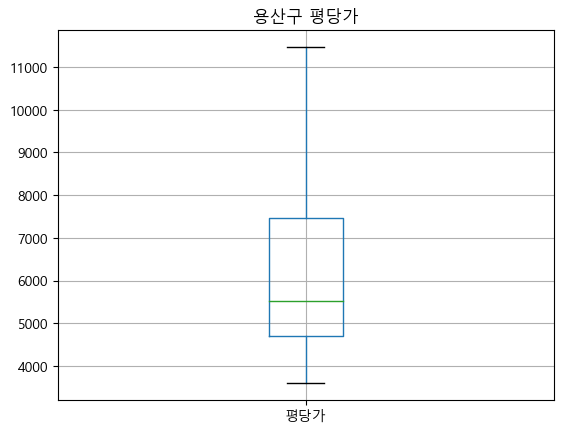

하위 25% :  3111.6816335000003
상위 25% :  4884.245549
은평구 평균 평당가:  4065.9844290059877
은평구 전체 개수 : 167
은평구 필터링 개수 167
이상치 개수(제거) : 0


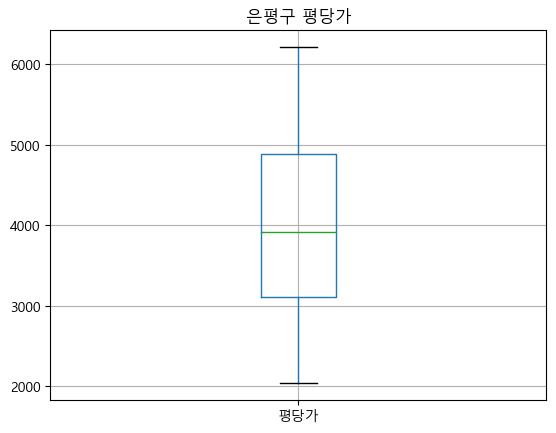

하위 25% :  4330.742358
상위 25% :  5737.703605
양천구 평균 평당가:  4960.984637
양천구 전체 개수 : 49
양천구 필터링 개수 49
이상치 개수(제거) : 0


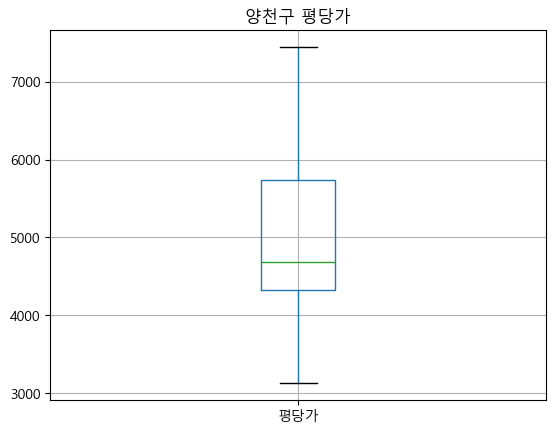

하위 25% :  4139.5447805
상위 25% :  5329.425747
중구 평균 평당가:  4784.369367253731
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


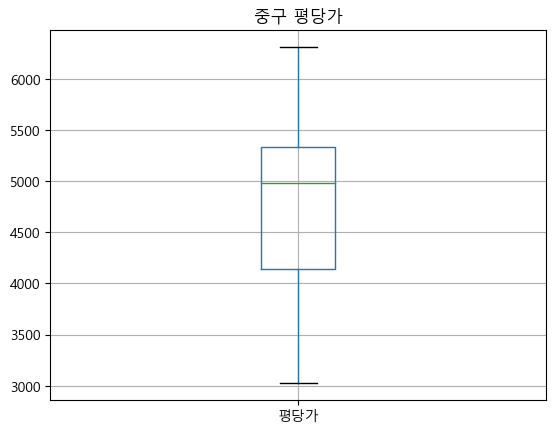

---------------------------------------
전체 시각화


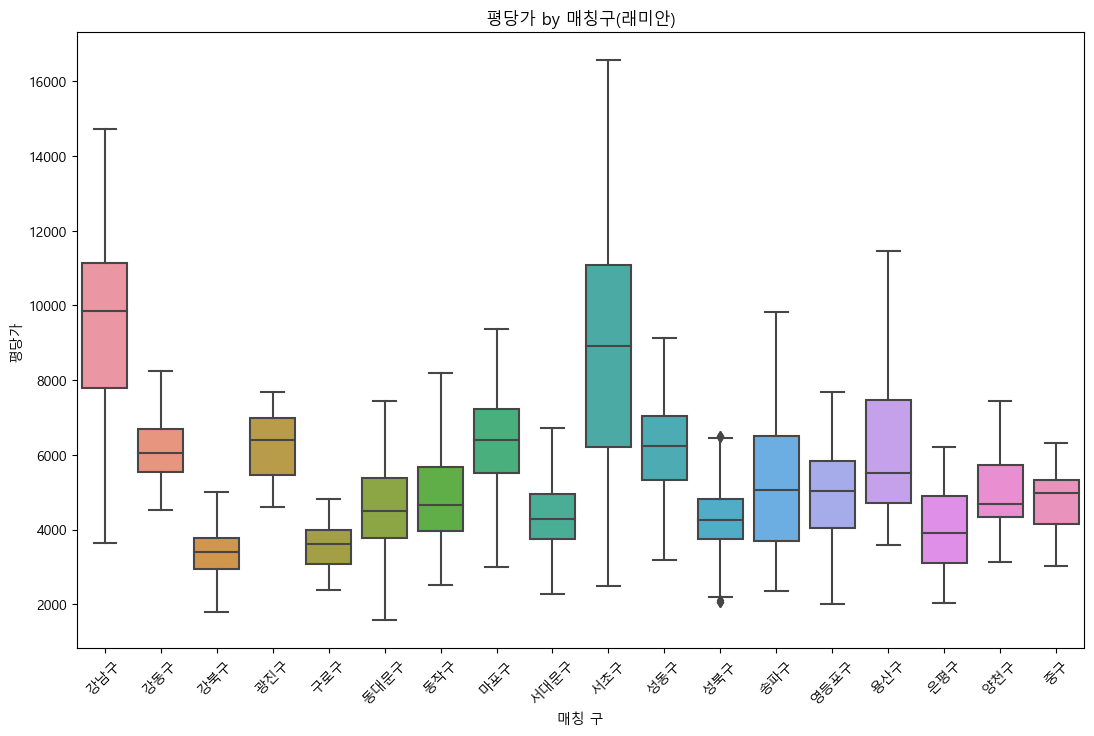

In [39]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



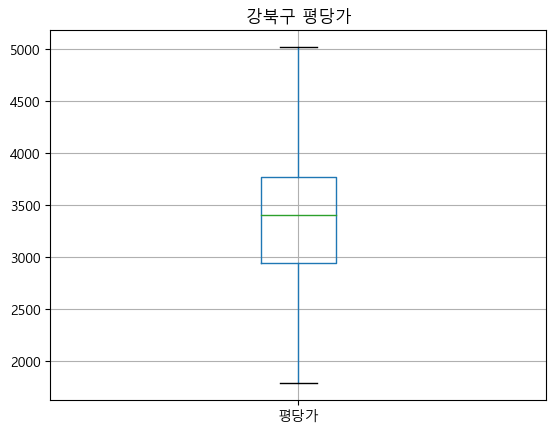

In [40]:
#데이터 문제 없이 이상치 제거
group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [41]:
data = filtered_data_total

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7970 entries, 0 to 7969
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7970 non-null   int64  
 1   층                                   7970 non-null   int64  
 2   매칭 구                                7970 non-null   object 
 3   건축년도                                7970 non-null   int64  
 4   건설수주_건축(단위 백만원)                     7970 non-null   object 
 5   건설수주_주택(단위 백만원)                     7970 non-null   object 
 6   매매가격지수(아파트)                         7970 non-null   float64
 7   경상수지(백만불)                           7970 non-null   object 
 8   무역수지(백만불)                           7970 non-null   object 
 9   대출금액(아파트)(억원)                       7970 non-null   object 
 10  대출잔액(아파트)(억원)                       7970 non-null   object 
 11  서울_신규_분양세대(단위: 세대)                  7970 no

In [43]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7970 entries, 0 to 7969
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7970 non-null   int64  
 1   층                                   7970 non-null   int64  
 2   매칭 구                                7970 non-null   object 
 3   건축년도                                7970 non-null   int64  
 4   건설수주_건축(단위 백만원)                     7970 non-null   float64
 5   건설수주_주택(단위 백만원)                     7970 non-null   float64
 6   매매가격지수(아파트)                         7970 non-null   float64
 7   경상수지(백만불)                           7970 non-null   float64
 8   무역수지(백만불)                           7970 non-null   float64
 9   대출금액(아파트)(억원)                       7970 non-null   float64
 10  대출잔액(아파트)(억원)                       7970 non-null   float64
 11  서울_신규_분양세대(단위: 세대)                  7970 no

# 정규화

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(data[['매칭 구']])
#data_road_name = ohe.fit_transform(data[['도로명']])
#data_matching_gu = ohe.fit_transform(data[['매칭 구']])

In [46]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '동대문구', '동작구', '마포구', '서대문구',
        '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '중구'],
       dtype=object)]

In [48]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [49]:
data = pd.concat([data.drop(columns=['매칭 구']), df_apt_name], axis=1)

In [50]:
data

,계약년월,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,202010,10,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,21047.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202010,10,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,21047.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202010,4,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,21047.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202011,17,2020,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,22428.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202011,17,2020,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,22428.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,202105,8,2011,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,202109,13,2011,12260118.0,7540232.0,102.7,9510.0,4278.0,19440.64,18239.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7967,202110,8,2011,12431593.0,7449740.0,103.5,7904.0,1812.0,19290.86,18114.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7968,202206,12,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.09,12629.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '동대문구', '동작구', '마포구', '서대문구',
        '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '중구'],
       dtype=object)]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7970 entries, 0 to 7969
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7970 non-null   int64  
 1   층                                   7970 non-null   int64  
 2   건축년도                                7970 non-null   int64  
 3   건설수주_건축(단위 백만원)                     7970 non-null   float64
 4   건설수주_주택(단위 백만원)                     7970 non-null   float64
 5   매매가격지수(아파트)                         7970 non-null   float64
 6   경상수지(백만불)                           7970 non-null   float64
 7   무역수지(백만불)                           7970 non-null   float64
 8   대출금액(아파트)(억원)                       7970 non-null   float64
 9   대출잔액(아파트)(억원)                       7970 non-null   float64
 10  서울_신규_분양세대(단위: 세대)                  7970 non-null   float64
 11  아파트 동(호)수_(단위: 호)                   7970 no

# 조건: 계약년도 scaler 진행하였음

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data.iloc[:, :42].values) #평당가 까지만 scaler 진행
oh_data = data.iloc[:, 42 : 60]

In [88]:
data_std

array([[-0.65594112, -0.15866056,  1.65637268, ..., -0.42294439,
        -1.45177177,  2.1978796 ],
       [-0.65594112, -0.15866056,  1.65637268, ..., -0.42294439,
        -1.45177177,  2.1978796 ],
       [-0.65594112, -1.00819004,  1.65637268, ..., -0.42294439,
        -1.45177177,  2.32004958],
       ...,
       [ 0.96589244, -0.44183705,  0.21658096, ...,  1.12255618,
        -0.58564237, -0.11559292],
       [ 2.52285267,  0.12451594,  0.21658096, ..., -0.78834444,
        -3.04417847, -0.13353936],
       [ 2.52285267, -1.43295478,  0.21658096, ..., -0.78834444,
        -3.04417847,  0.16490511]])

In [89]:
oh_data

,강남구,강동구,강북구,광진구,구로구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## scaler 한 데이터와 one hot encoding한 데이터 합치기

In [91]:
# data_std (NumPy 배열)를 DataFrame으로 변환
# 여기서 columns는 data_std의 열 이름을 지정합니다 (예: ['col1', 'col2', ..., 'colN'])
data_std_df = pd.DataFrame(data_std, columns=data.columns[:42])

# data_std_df와 oh_data를 가로 방향으로 결합
scaled_df = pd.concat([data_std_df, oh_data], axis=1)


# 마지막 매칭구를 제외하고는 나머지 전부 data scaler 진행함

In [92]:
scaled_df

,계약년월,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.655941,-1.008190,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,0.884801,-0.441837,0.216581,-0.397153,-1.036294,0.540630,1.271115,-0.128986,-0.148187,0.036617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,0.949674,0.266104,0.216581,-0.242509,-0.248695,1.692955,0.744783,0.413531,-0.402636,-0.197058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7967,0.965892,-0.441837,0.216581,-0.195180,-0.284842,1.942106,0.274394,-0.500300,-0.417978,-0.214546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7968,2.522853,0.124516,0.216581,1.640153,0.506127,2.128970,-0.264532,-2.087088,-1.035007,-0.977390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# VIF를 통한 다중공선성 측정할 때, one-hot encoding 데이터는 빼줘야함!

In [93]:
data_vif = scaled_df.iloc[:, :41] #평당가(TARGET DATA) 제거하고,  독립변수들 간의 상관관계만 보기

VIF 할 때, TARGET DATA 제거하기

In [94]:
data_vif.isnull().sum()

계약년월                                  0
층                                     0
건축년도                                  0
건설수주_건축(단위 백만원)                       0
건설수주_주택(단위 백만원)                       0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
아파트 건물면적_(천)                          0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
소비자물가지수 주택, 수도, 전기 및 연료               0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0


# VIF 함수

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")
    return vif_data

In [96]:
vif_df = calculate_vif(data_vif)
print(vif_df)

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                               feature         VIF
0                                 계약년월         inf
1                                    층        1.03
2                                 건축년도        1.04
3                      건설수주_건축(단위 백만원)  1858642.08
4                      건설수주_주택(단위 백만원)    95452.85
5                          매매가격지수(아파트)   268113.43
6                            경상수지(백만불)   158218.35
7                            무역수지(백만불)   379817.24
8                        대출금액(아파트)(억원)   201864.04
9                        대출잔액(아파트)(억원)   427001.34
10                  서울_신규_분양세대(단위: 세대)   366178.23
11                   아파트 동(호)수_(단위: 호)   125080.02
12                        아파트 건물면적_(천)   115290.48
13                        생산자물가지수 총지수     33464.66
14                 전규모(1인이상) 전체임금총액[원]   167483.18
15                        소비자물가지수 총지수     69591.64
16             소비자물가지수 주택, 수도, 전기 및 연료    83765.86
17                          가계대출 (연리%)    18938.87
18                    경기종합지수(20

In [98]:
# vif 제거 한 scaled df
scaled_df #41번쨰(41번째 인덱스)가 "평당가"

,계약년월,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.655941,-1.008190,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,0.884801,-0.441837,0.216581,-0.397153,-1.036294,0.540630,1.271115,-0.128986,-0.148187,0.036617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,0.949674,0.266104,0.216581,-0.242509,-0.248695,1.692955,0.744783,0.413531,-0.402636,-0.197058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7967,0.965892,-0.441837,0.216581,-0.195180,-0.284842,1.942106,0.274394,-0.500300,-0.417978,-0.214546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7968,2.522853,0.124516,0.216581,1.640153,0.506127,2.128970,-0.264532,-2.087088,-1.035007,-0.977390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [100]:
#target
y = scaled_df.iloc[:, 41]

#train
X = scaled_df.drop(scaled_df.columns[41], axis=1)

In [101]:
y

0       2.197880
1       2.197880
2       2.320050
3       2.370954
4       2.370954
          ...   
7965    0.318078
7966   -0.133539
7967   -0.115593
7968   -0.133539
7969    0.164905
Name: 평당가, Length: 7970, dtype: float64

In [102]:
X

,계약년월,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.655941,-0.158661,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.655941,-1.008190,1.656373,-0.840134,-0.540458,-0.331399,1.490786,0.949748,0.114808,0.193394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.639723,0.832457,1.656373,0.102638,0.199847,-0.269112,0.776708,0.980135,0.273910,0.385514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7965,0.884801,-0.441837,0.216581,-0.397153,-1.036294,0.540630,1.271115,-0.128986,-0.148187,0.036617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,0.949674,0.266104,0.216581,-0.242509,-0.248695,1.692955,0.744783,0.413531,-0.402636,-0.197058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7967,0.965892,-0.441837,0.216581,-0.195180,-0.284842,1.942106,0.274394,-0.500300,-0.417978,-0.214546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7968,2.522853,0.124516,0.216581,1.640153,0.506127,2.128970,-0.264532,-2.087088,-1.035007,-0.977390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size = 0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [105]:
print(X.shape)
print(y.shape)

(7970, 59)
(7970,)


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4782, 59) (1594, 59) (1594, 59) (4782,) (1594,) (1594,)


In [107]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [108]:
import re

def preprocess_dataframes(*dataframes):
    processed_dfs = []
    for df in dataframes:
        processed_df = df.copy()
        # 정규 표현식을 사용하여 불필요한 문자 제거
        processed_df.columns = [re.sub(r'[^\w\s]', '', col).replace(' ', '_') for col in processed_df.columns]
        processed_dfs.append(processed_df)
    return processed_dfs

# 데이터 전처리 적용
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)


In [109]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [110]:
#결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain MSE\t\tVal MSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{mse_train:.4f}\t\t{mse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [111]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [112]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [113]:
#데이터 전처리
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)

In [114]:
#모델 훈련
models = train_models(X_train_processed, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 4782, number of used features: 59
[LightGBM] [Info] Start training from score 0.007275


In [115]:
#모델 성능평가
evaluate_models(models, X_train_processed, y_train, X_val_processed, y_val)

Model Performance Evaluation:

Model                	Train MSE		Val MSE    		Train R²	Val R²
-------------------------------------------------------------
LinearRegression 	0.2730		0.2716		0.73		0.71
Lasso            	1.0059		0.9357		0.00		-0.00
Ridge            	0.2731		0.2713		0.73		0.71
XGBRegressor     	0.0513		0.1772		0.95		0.81
LGBMRegressor    	0.0940		0.1536		0.91		0.84


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 4782, number of used features: 59
[LightGBM] [Info] Start training from score 0.007275


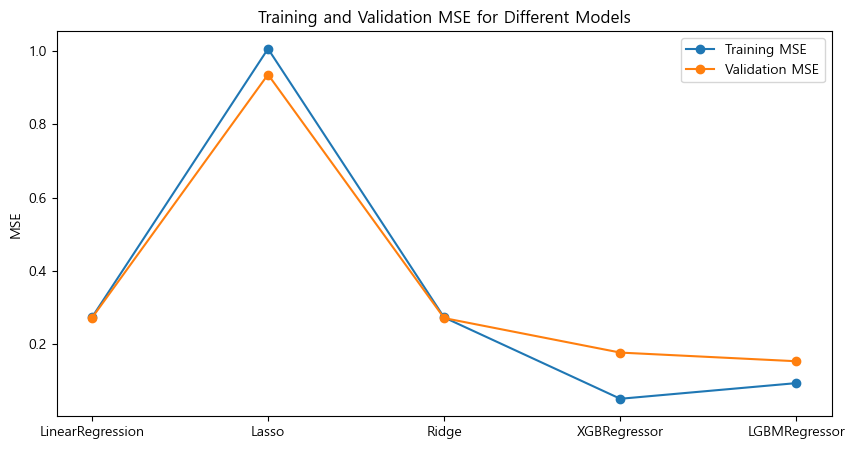

In [116]:
#결과 시각화
plot_mse_for_models_line(models, X_train_processed, y_train, X_val_processed, y_val)

In [117]:
#모델 test평가
evaluate_models_on_test(models, X_test_processed, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	0.3020		71.15%
Lasso            	1.0469		-0.01%
Ridge            	0.3019		71.16%
XGBRegressor     	0.1743		83.34%
LGBMRegressor    	0.1600		84.72%


In [118]:
X_train.columns

Index(['계약년월', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '아파트 건물면적_(천)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '강남구', '강동구',
       '강북구', '광진구', '구로구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '영등포구', '용산

#xgboost early stop

[0]	validation_0-rmse:0.84539	validation_1-rmse:0.83849
[1]	validation_0-rmse:0.66342	validation_1-rmse:0.67018
[2]	validation_0-rmse:0.54857	validation_1-rmse:0.56678
[3]	validation_0-rmse:0.47494	validation_1-rmse:0.50570
[4]	validation_0-rmse:0.43068	validation_1-rmse:0.47246
[5]	validation_0-rmse:0.40360	validation_1-rmse:0.45337
[6]	validation_0-rmse:0.38461	validation_1-rmse:0.43858
[7]	validation_0-rmse:0.37154	validation_1-rmse:0.43145
[8]	validation_0-rmse:0.36121	validation_1-rmse:0.42387
[9]	validation_0-rmse:0.35400	validation_1-rmse:0.41846
[10]	validation_0-rmse:0.34737	validation_1-rmse:0.41526
[11]	validation_0-rmse:0.34251	validation_1-rmse:0.41440
[12]	validation_0-rmse:0.33827	validation_1-rmse:0.41351
[13]	validation_0-rmse:0.33474	validation_1-rmse:0.41166
[14]	validation_0-rmse:0.33186	validation_1-rmse:0.41055
[15]	validation_0-rmse:0.32893	validation_1-rmse:0.40936
[16]	validation_0-rmse:0.32690	validation_1-rmse:0.40896
[17]	validation_0-rmse:0.32335	validation

[20]	validation_0-rmse:0.31831	validation_1-rmse:0.40742
[21]	validation_0-rmse:0.31669	validation_1-rmse:0.40759
[22]	validation_0-rmse:0.31448	validation_1-rmse:0.40685


c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[23]	validation_0-rmse:0.31239	validation_1-rmse:0.40685
[24]	validation_0-rmse:0.31065	validation_1-rmse:0.40596
[25]	validation_0-rmse:0.30850	validation_1-rmse:0.40601
[26]	validation_0-rmse:0.30679	validation_1-rmse:0.40544
[27]	validation_0-rmse:0.30436	validation_1-rmse:0.40507
[28]	validation_0-rmse:0.30281	validation_1-rmse:0.40560
[29]	validation_0-rmse:0.30181	validation_1-rmse:0.40621
[30]	validation_0-rmse:0.29982	validation_1-rmse:0.40609
[31]	validation_0-rmse:0.29871	validation_1-rmse:0.40615
[32]	validation_0-rmse:0.29679	validation_1-rmse:0.40743
[33]	validation_0-rmse:0.29605	validation_1-rmse:0.40719
[34]	validation_0-rmse:0.29442	validation_1-rmse:0.40715
[35]	validation_0-rmse:0.29402	validation_1-rmse:0.40712
[36]	validation_0-rmse:0.29295	validation_1-rmse:0.40695


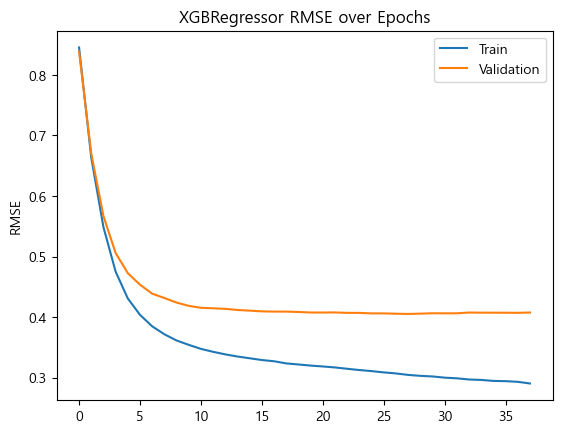

Xgboost Best Epoch:  27


In [119]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]
reg_xgb.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행
-Xgboost Best Epoch:  27

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_processed, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  0.1607018453746386
XGBoost Test R² Score: 84.65%


#light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[79]	valid_0's rmse: 0.3908	valid_0's l2: 0.152725

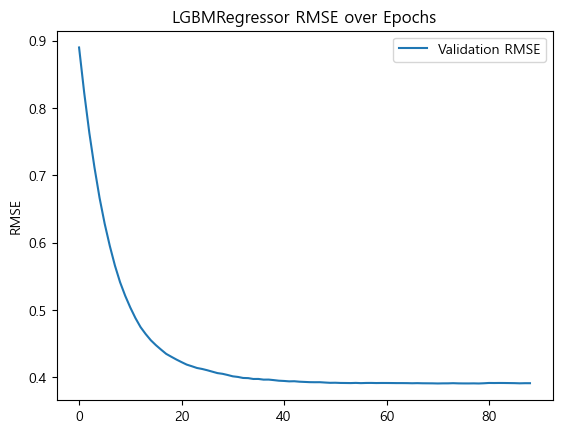

LGBM Best Epoch:  27


In [121]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_processed, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("LGBM Best Epoch: ", best_epoch)


# LGBM best_iteration으로 test 진행
LGBM Best Epoch:  27

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test MSE: ", mse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test MSE:  0.15815706122000167
LightGBM Test R² Score: 84.89%
